# CAPSTON ~ FORD CAR PRICE PREDICTION :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Bussiness Problem / Data Understanding :
    I'm embarking on a project to predict the prices of Ford cars. The main goal is to use a method called regression to build a computer model that considers various factors like the car's features, what people want, and economic trends. The aim is to create a tool that helps people in the car business make smarter decisions about pricing, giving them a competitive edge in the market.

In [2]:
# Importing the Data :
df = pd.read_csv("F:\\KAGGLE\\FORD CAR PRICE PREDICTION\\ford.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [3]:
# Identifying the data types :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [4]:
catagorical = df[["model","transmission","fuelType"]]
continous = df[["mileage","tax","mpg","engineSize"]]

In [5]:
for i in catagorical :
    a = catagorical[i].nunique()
    print(a,"NO: OF unique values in ",i)    

24 NO: OF unique values in  model
3 NO: OF unique values in  transmission
5 NO: OF unique values in  fuelType


In [6]:
# iDENTIFYING THE NUMBER O UNIQUE VALUES :
for i in df:
    a = df[i].nunique()
    print(a,"------------>",i)

24 ------------> model
23 ------------> year
3511 ------------> price
3 ------------> transmission
13528 ------------> mileage
5 ------------> fuelType
36 ------------> tax
90 ------------> mpg
16 ------------> engineSize


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


# Data Preprocessing : Data Cleaning + Data Warngling 

In [8]:
# Check for missing Values :
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [9]:
# Check for duplicates :
df.duplicated().value_counts()

False    17812
True       154
Name: count, dtype: int64

In [10]:
df["year"].value_counts()

year
2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: count, dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df["year"].replace(2060,2006.,inplace=True)

In [13]:
# Check for duplicates :
df.duplicated().value_counts()

False    17812
Name: count, dtype: int64

In [14]:
# Check for normality :
continous.skew()

mileage       1.842068
tax          -0.564082
mpg           0.603923
engineSize    1.893121
dtype: float64

In [15]:
# Exporting cleand data as cvs file for Data visuavalization :
ford_cleaned = df.to_csv("ford_cleaned.csv")

In [16]:
pwd

'F:\\JUPITER'

In [17]:
# Applying box cox Transformations :
from scipy import stats
df["mileage1"],params = stats.boxcox(df["mileage"]+0.001)
df.drop(["mileage"],axis=1)

df["engineSize1"],params = stats.boxcox(df["engineSize"]+0.001)
df.drop(["engineSize"],axis=1)

df["price1"],params = stats.boxcox(df["price"]+0.001)
df.drop(["price"],axis = 1)


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,mileage1,engineSize1,price1
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0,92.926881,0.001000,97.227475
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0,75.038868,0.001000,103.406984
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0,84.620794,0.001000,100.389829
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5,79.184452,0.453617,113.036329
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0,37.184291,0.001000,110.415328
...,...,...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4,94.571334,0.369504,86.638658
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0,132.311757,0.001000,80.518938
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6,67.968533,0.535160,90.378509
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2,59.735928,0.192426,83.867153


In [18]:
# Recheck for skewness :
print("Skewness of mileage:",df["mileage1"].skew())
print("Skewness of engineSize:",df["engineSize1"].skew())
print("Skewness of price:",df["price1"].skew())

Skewness of mileage: 0.03379839149351797
Skewness of engineSize: 0.47022055286639525
Skewness of price: 0.05510399161842365


# EDA - Exploratory Data Analysis :

In [19]:
continous.columns

Index(['mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

In [20]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'mileage1', 'engineSize1', 'price1'],
      dtype='object')

In [21]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mileage1,engineSize1,price1
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,92.926881,0.001000,97.227475
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,75.038868,0.001000,103.406984
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,84.620794,0.001000,100.389829
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,79.184452,0.453617,113.036329
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,37.184291,0.001000,110.415328
...,...,...,...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4,94.571334,0.369504,86.638658
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0,132.311757,0.001000,80.518938
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6,67.968533,0.535160,90.378509
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2,59.735928,0.192426,83.867153


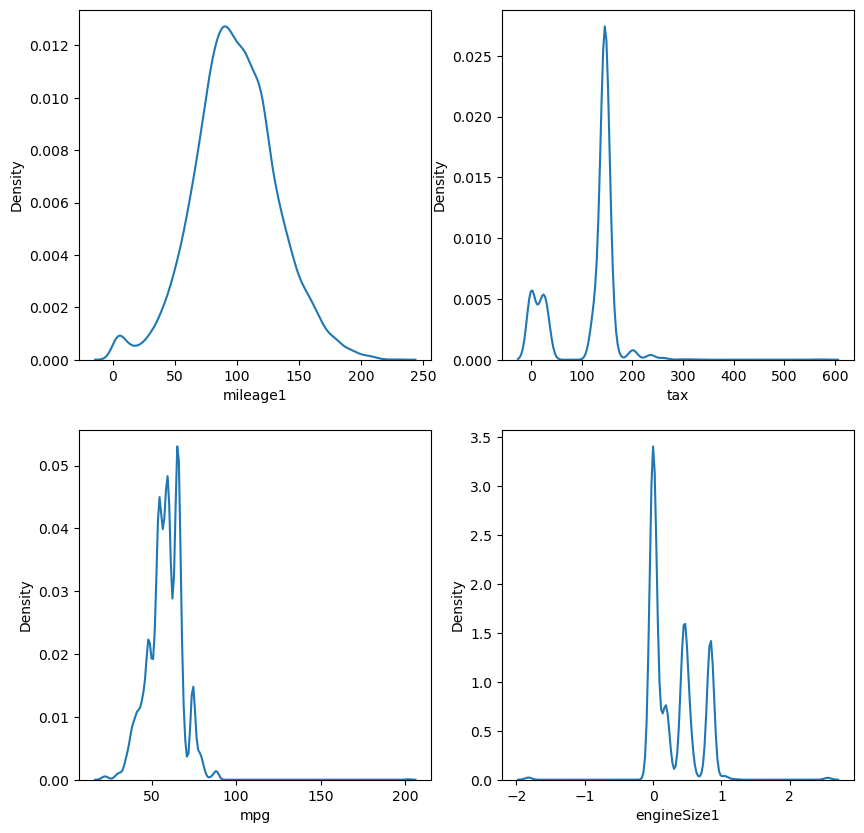

In [22]:
# kde plot :
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(df["mileage1"])


plt.subplot(2,2,2)
sns.kdeplot(df["tax"])


plt.subplot(2,2,3)
sns.kdeplot(df["mpg"])


plt.subplot(2,2,4)
sns.kdeplot(df["engineSize1"])
plt.show()

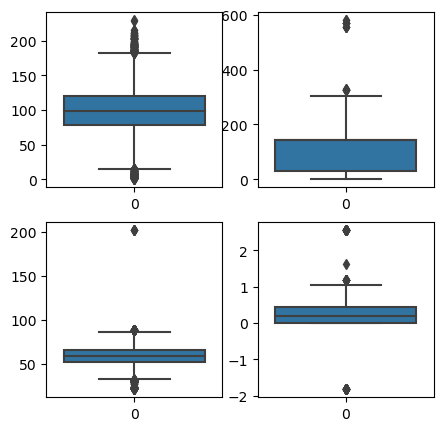

In [23]:
# Applying Box Plot :

plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
sns.boxplot(df["mileage1"])

plt.subplot(2,2,2)
sns.boxplot(df["tax"])

plt.subplot(2,2,3)
sns.boxplot(df["mpg"])

plt.subplot(2,2,4)
sns.boxplot(df["engineSize1"])

plt.show()

# EDA BY USING POWER BI :

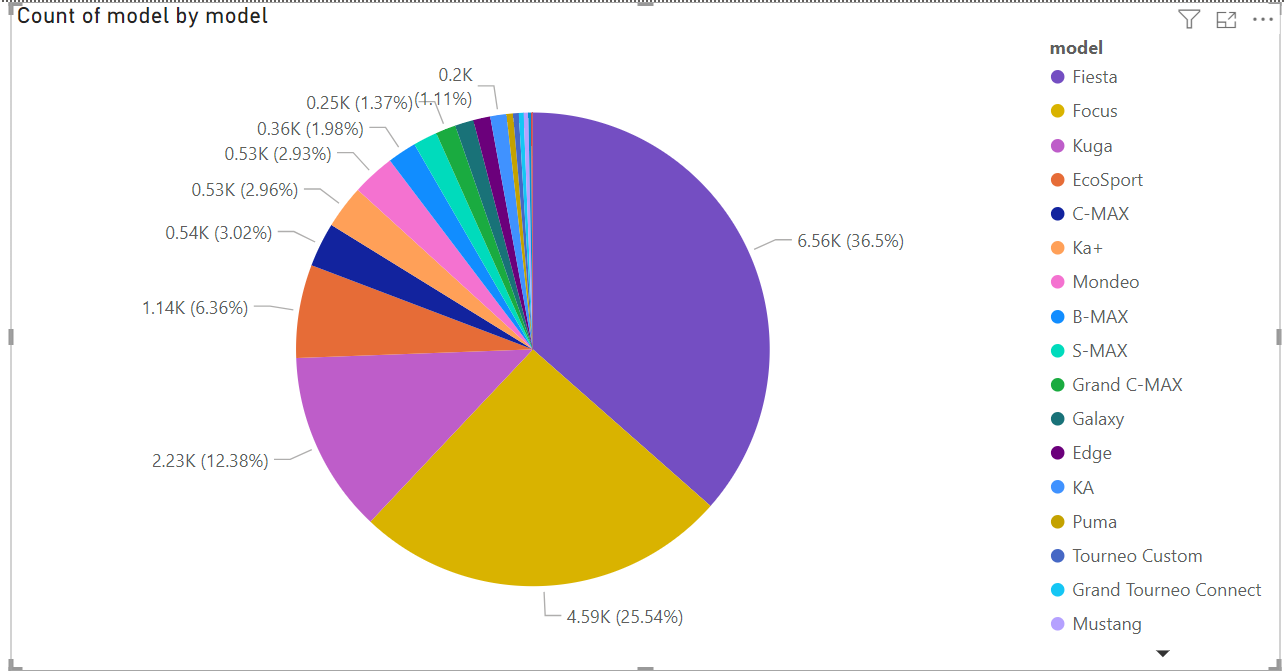

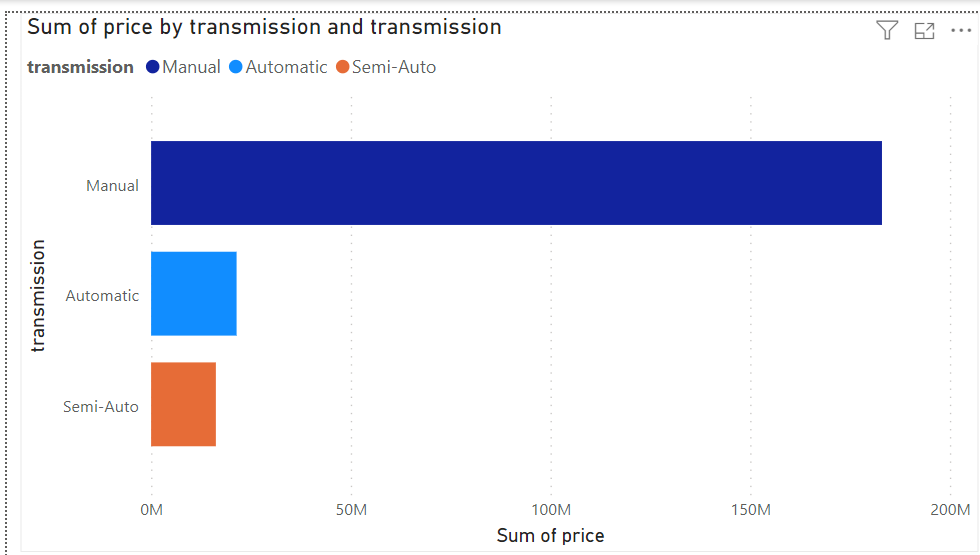


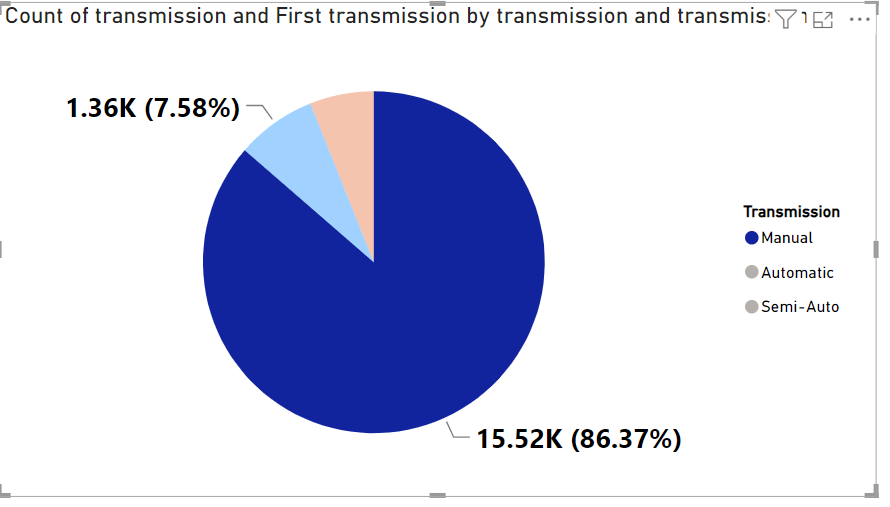

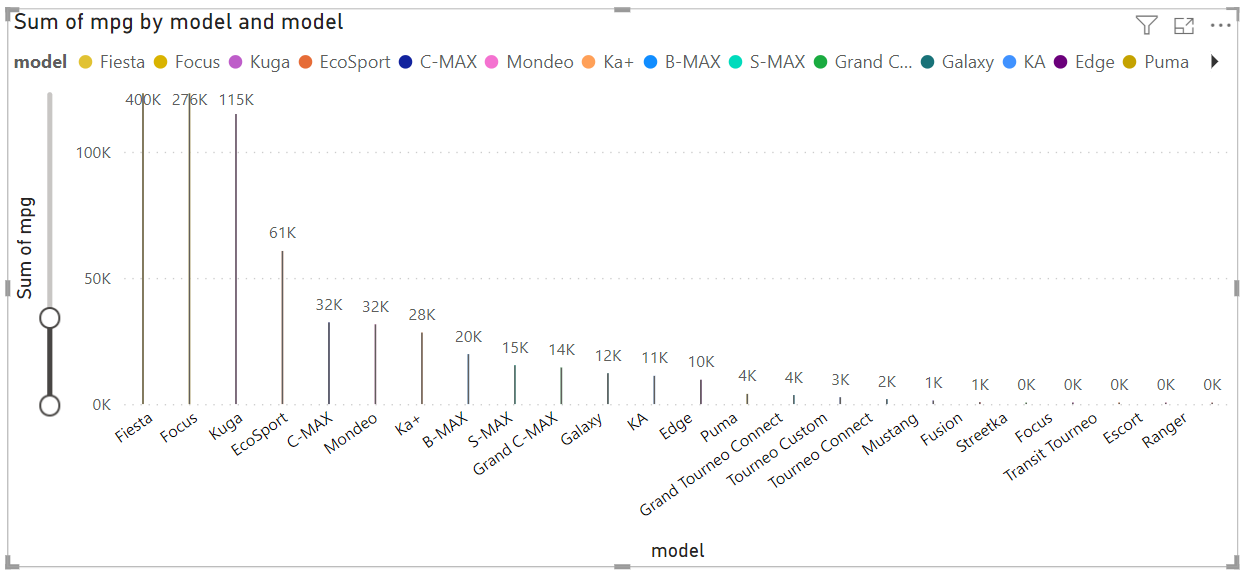

# EDA BY TABLUE :

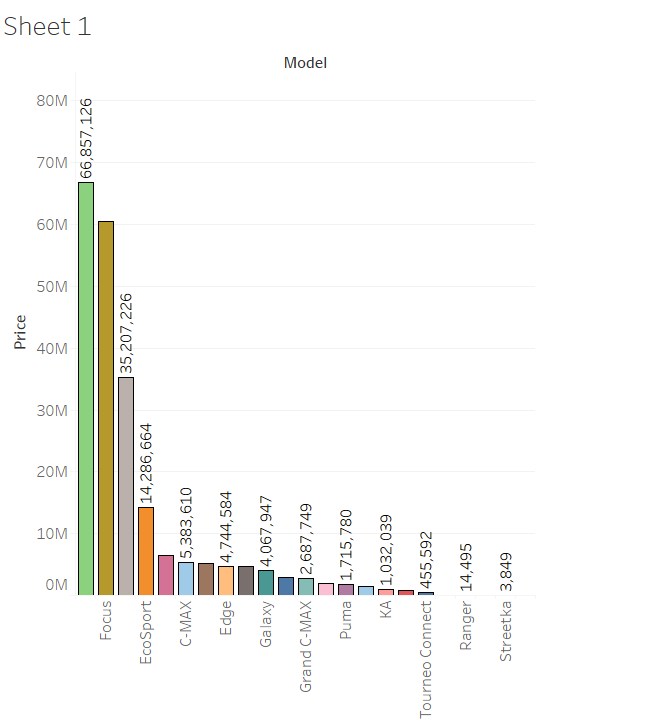

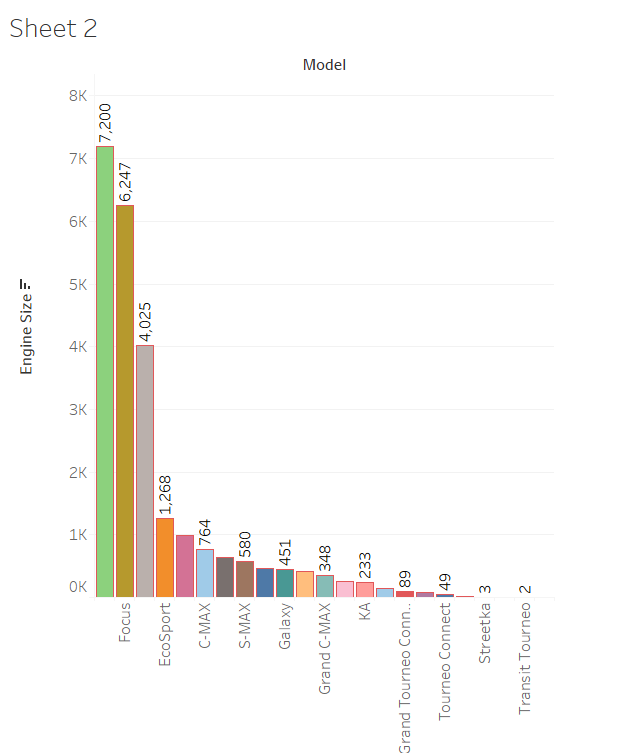

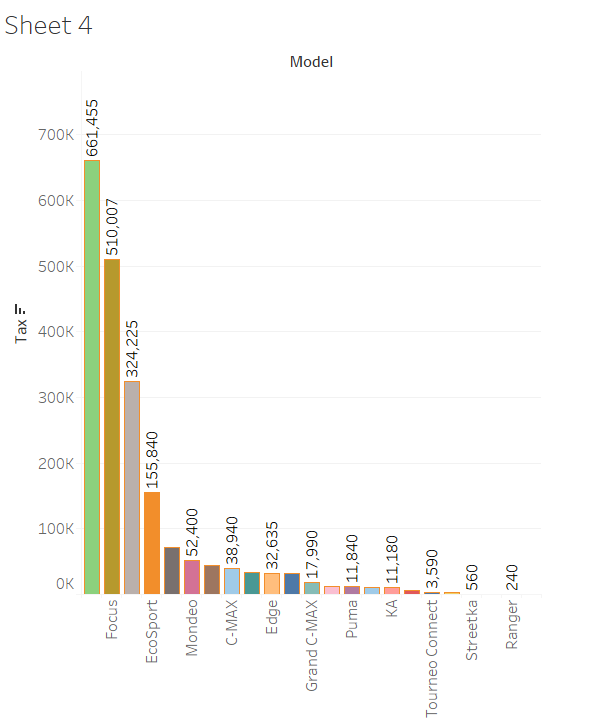

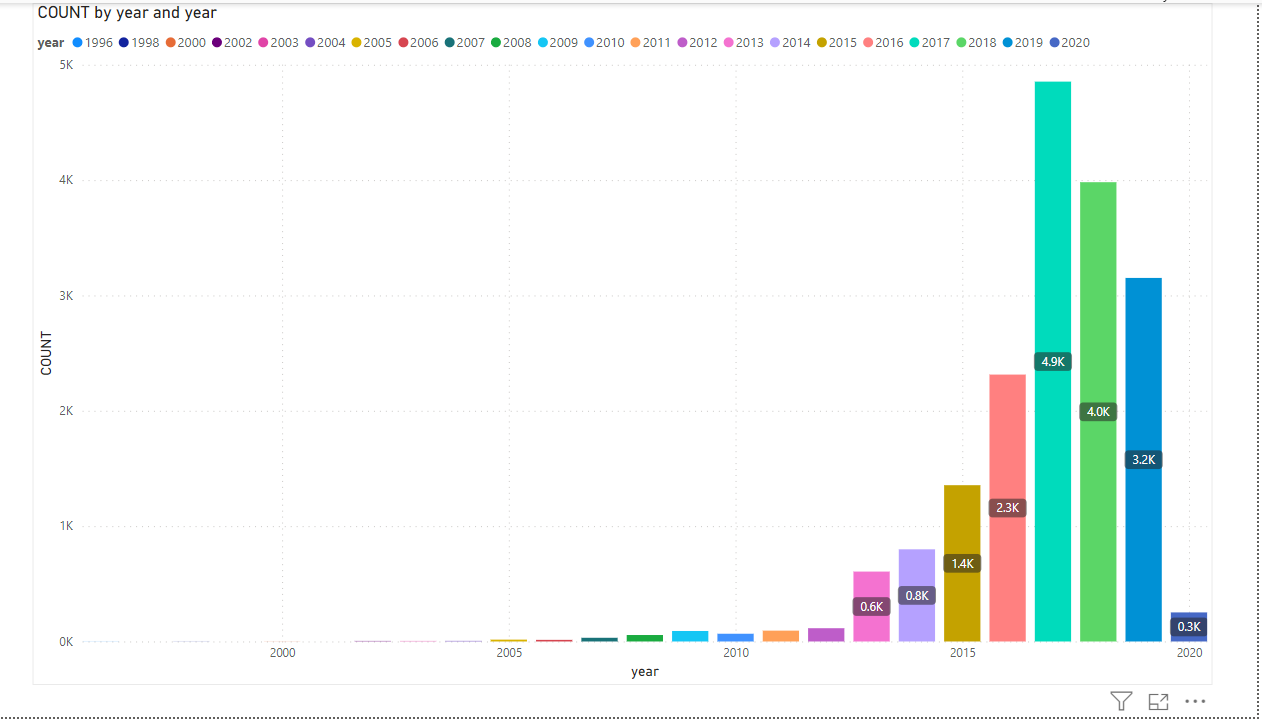

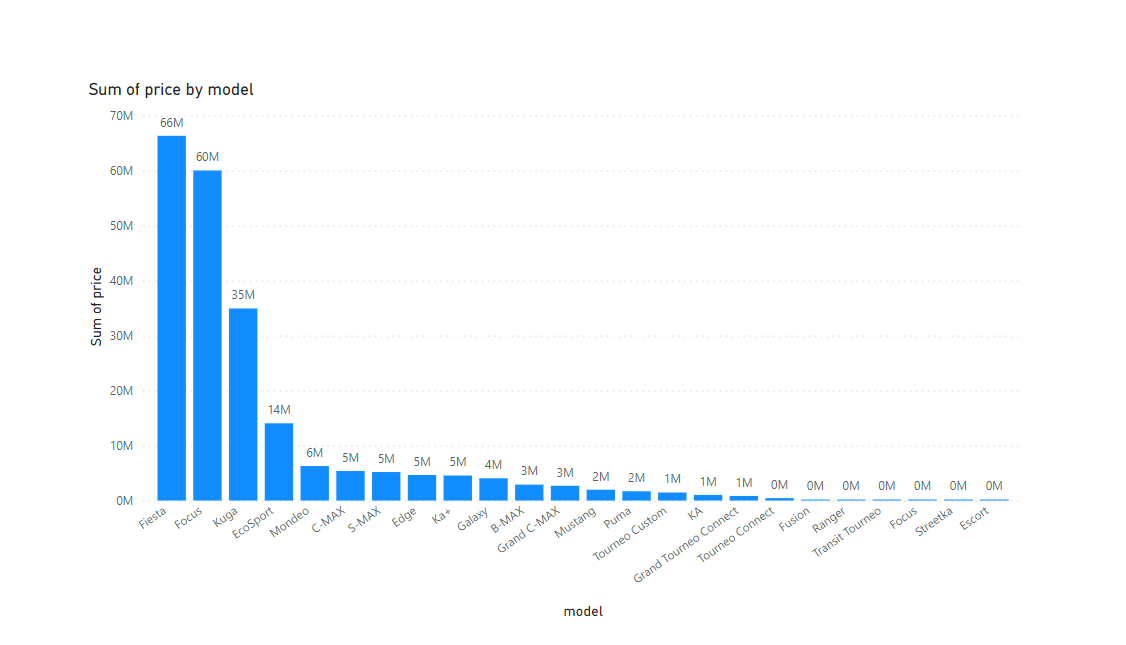

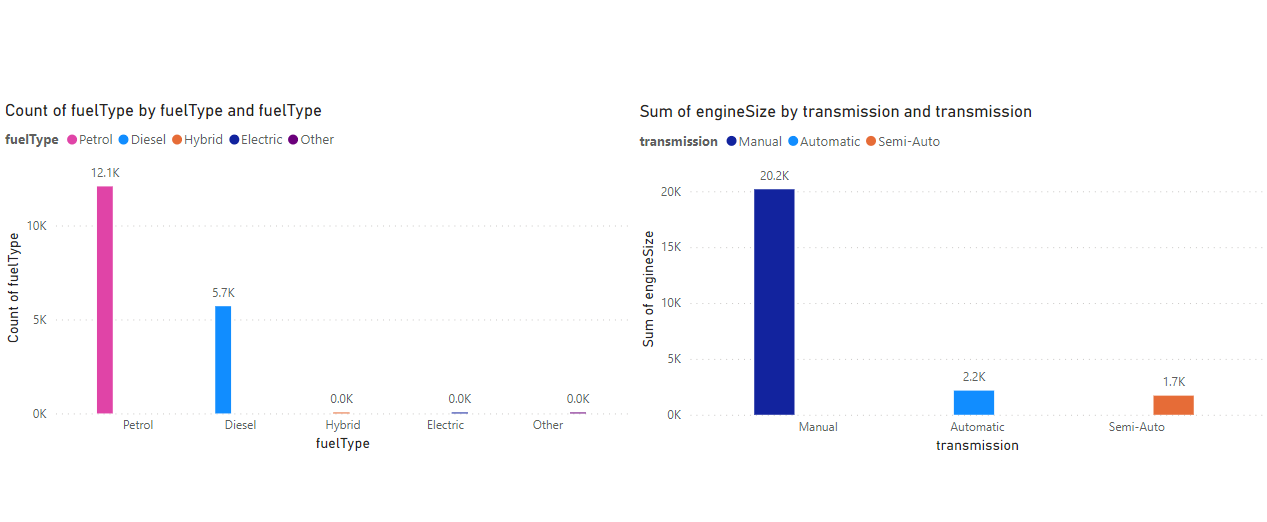

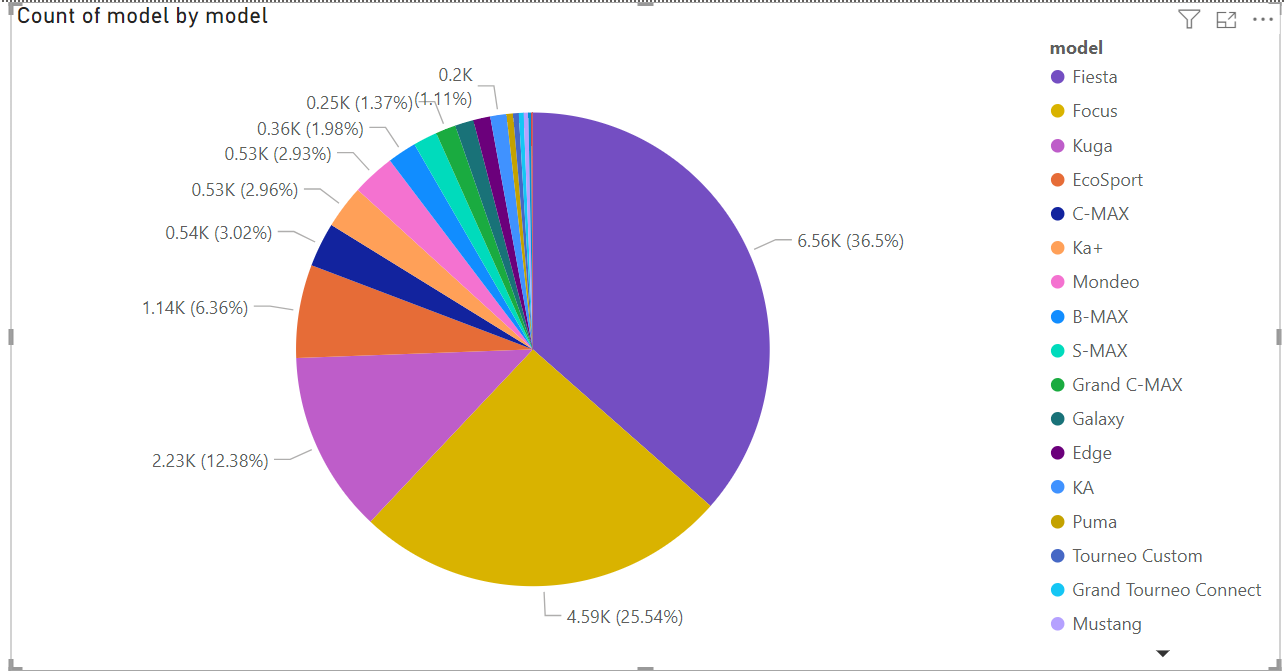

In [24]:
df.drop(["price1"],axis=1,inplace=True)
df.drop(["mileage"],axis=1,inplace=True)
df.drop(["engineSize"],axis=1,inplace=True)
df.head()

,model,year,price,transmission,fuelType,tax,mpg,mileage1,engineSize1
0,Fiesta,2017,12000,Automatic,Petrol,150,57.7,92.926881,0.001000
1,Focus,2018,14000,Manual,Petrol,150,57.7,75.038868,0.001000
2,Focus,2017,13000,Manual,Petrol,150,57.7,84.620794,0.001000
3,Fiesta,2019,17500,Manual,Petrol,145,40.3,79.184452,0.453617
4,Fiesta,2019,16500,Automatic,Petrol,145,48.7,37.184291,0.001000


# Model Creation :

# 1 . Multi linear Regression :

In [25]:
print("=============== Multi Linear Regression =================")
# Step 1 : Deviding the the input & output data :
X = pd.get_dummies(df.drop(["price"],axis=1),drop_first=True)
y = df["price"]

# Step 2 : Applying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,train_size=0.8)

# Step 3 : Applying the model :
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

# Step 4 : Predicting the new train values :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : Checking the error :
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print("Train Error :",rmse)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Error :",rmse)

# Step 6 : Checking the accuracy :
print("Train Accuracy:",model.score(X_train,y_train))
print("Train Accuracy:",model.score(X_test,y_test))

# Step 7 : Check For Cross Validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X,y,cv=5).mean()
print("Cross Validation Score :",cvs)

=============== Multi Linear Regression =================
Train Error : 1783.2402460801097
Test Error : 1807.4587385253208
Train Accuracy: 0.858418503016582
Train Accuracy: 0.853582837683778
Cross Validation Score : 0.8355823189352272


In [26]:
len(X_train.columns)

34

In [27]:
# Priciple compound Analysis :
from sklearn.decomposition import PCA
pca = PCA(n_components=32)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
pca.explained_variance_ratio_

array([7.92942429e-01, 1.91496308e-01, 1.49397843e-02, 3.86835455e-04,
       8.14257558e-05, 4.75724344e-05, 2.62829485e-05, 1.86447359e-05,
       1.40455125e-05, 8.47617458e-06, 6.08986525e-06, 5.57578543e-06,
       5.06098305e-06, 4.54943772e-06, 3.44513028e-06, 2.95841708e-06,
       2.48400480e-06, 2.30863191e-06, 1.77717653e-06, 1.02122863e-06,
       7.98554340e-07, 5.97353153e-07, 4.74726381e-07, 3.68926182e-07,
       2.16519066e-07, 2.07126337e-07, 1.52196821e-07, 2.75848616e-08,
       2.73636119e-08, 1.38667604e-08, 1.38436966e-08, 1.38038350e-08])

In [28]:
# Step 3 : Applying the model :
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train1,y_train)

# Step 4 : Predicting the new train values :
y_train_pred = model.predict(X_train1)
y_test_pred = model.predict(X_test1)

# Step 5 : Checking the error :
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print("Train Error :",rmse)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Error :",rmse)

# Step 6 : Checking the accuracy :
print("Train Accuracy:",model.score(X_train1,y_train))
print("Train Accuracy:",model.score(X_test1,y_test))

# Step 7 : Check For Cross Validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X,y,cv=5).mean()
print("Cross Validation Score :",cvs)

Train Error : 1787.7306900874698
Test Error : 1807.5476796615774
Train Accuracy: 0.8577045619126029
Train Accuracy: 0.8535684275853219
Cross Validation Score : 0.8355823189352272


# Check for assusptions :

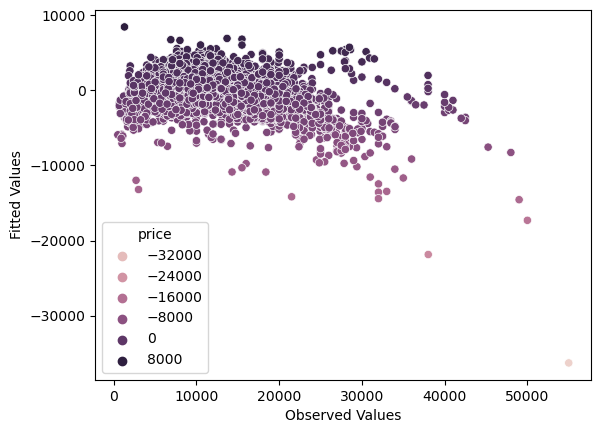

In [29]:
# 1 : Check for Lienarity :
error = y_train_pred - y_train
sns.scatterplot(x=y_train,y=error,hue=error)
plt.xlabel("Observed Values")
plt.ylabel("Fitted Values")
plt.show()

-1.5318327710372226


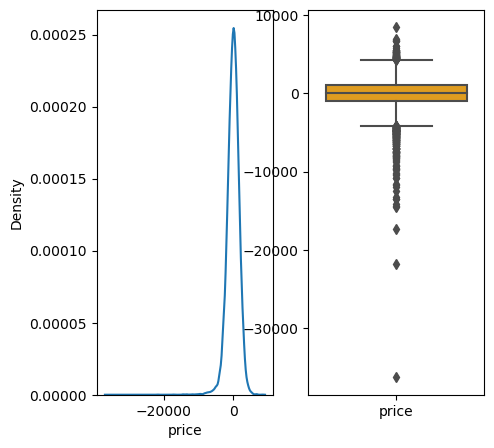

In [30]:
# 2. Check For Normality :
print(error.skew())

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.kdeplot(error)
plt.subplot(1,2,2)
errors = pd.DataFrame(error)
sns.boxplot(errors,color="orange")
plt.show()

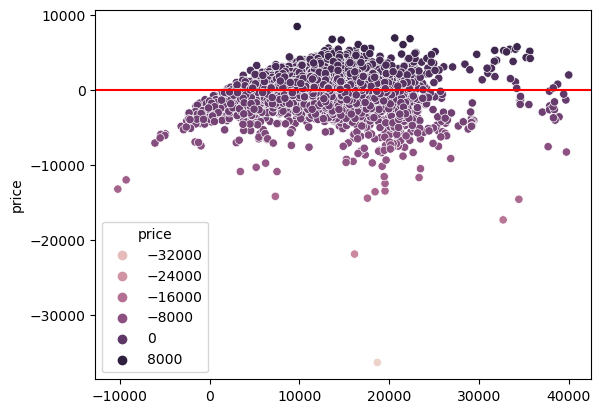

In [31]:
# 3 : Equal Variance Of error :
sns.scatterplot(x=y_train_pred,y=error,hue = error)
plt.axhline(y=0,color="red")
plt.show()

import statsmodels.formula.api as smf
model_2 = smf.ols("y~X",data=df).fit()
model_2.summary()


----------------------------------------------

PatsyError: categorical data cannot be >1-dimensional


# 2. Polynomial Regression :

In [32]:
print ("========================= Polynomial Regression =========================")
# Step 1 : Deviding Dependent and Independent Variables : 
X = pd.get_dummies(df.drop(["price"],axis=1),drop_first=True)
y = df["price"]

# Step 2 : Applying Train Test Split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

# Applying Polynomial Regression :
from sklearn.preprocessing import PolynomialFeatures
poly_con = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = pd.DataFrame(poly_con.fit_transform(X_train))
X_test_poly = pd.DataFrame(poly_con.transform(X_test))

# Step 3 : Applying Model :
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

# Step 4 : Predicting on train data :
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Step 5 : Checking the error :
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print("Train Error :",rmse)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Error :",rmse)

# Step 6 : Checking the accuracy :
print("Train Accuracy:",model.score(X_train_poly,y_train))
print("Train Accuracy:",model.score(X_test_poly,y_test))

# Step 7 : Check For Cross Validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X,y,cv=5).mean()
print("Cross Validation Score :",cvs) 

========================= Polynomial Regression =========================
Train Error : 1369.1995780809598
Test Error : 1327.1322754315668
Train Accuracy: 0.9171407638648631
Train Accuracy: 0.9184983997333952
Cross Validation Score : 0.8355823189352272


# 3. Lasso Regression :

In [41]:
print("================ Lasso Regression =================")
# Step 1 : Devideing the Dependent And indipendent Variables :
X = pd.get_dummies(df.drop(["price"],axis=1),drop_first=True)
y = df["price"]

# Step 2 : Applying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

# Step 3 : Applying the Ml Algorithem :
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,y_train)

# Step 4 : Predictiong on New data :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : Checking the error :
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print("Train Error :",rmse)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Error :",rmse)

# Step 6 : Check for Acccuracy :
print("Train Accuracy :",model.score(X_train,y_train))
print("Test Accuracy :",model.score(X_test,y_test))

# Step 7 : Applying cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X,y,cv=5).mean()
print("Cross Validation Score :",cvs)

================ Lasso Regression =================
Train Error : 1806.3629020553876
Test Error : 1753.7868159840843
Train Accuracy : 0.8557826793178431
Test Accuracy : 0.8576716824527768
Cross Validation Score : 0.8342868136119079


In [49]:
# Hypertuning :
from sklearn.model_selection import GridSearchCV
estimator = Lasso()
param_grid = {"alpha":list(range(1,50))}
model_p = GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
model_p.fit(X_train,y_train)
model_p.best_params_

{'alpha': 1}

In [53]:
print("================ Final Lasso Regression =================")
# Step 1 : Devideing the Dependent And indipendent Variables :
X = pd.get_dummies(df.drop(["price"],axis=1),drop_first=True)
y = df["price"]

# Step 2 : Applying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

# Step 3 : Applying the Ml Algorithem :
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(X_train,y_train)

# Step 4 : Predictiong on New data :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : Checking the error :
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print("Train Error :",rmse)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Error :",rmse)

# Step 6 : Check for Acccuracy :
print("Train Accuracy :",model.score(X_train,y_train))
print("Test Accuracy :",model.score(X_test,y_test))

# Step 7 : Applying cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X,y,cv=5).mean()
print("Cross Validation Score :",cvs)

================ Final Lasso Regression =================
Train Error : 1806.3629020553876
Test Error : 1753.7868159840843
Train Accuracy : 0.8557826793178431
Test Accuracy : 0.8576716824527768
Cross Validation Score : 0.8342868136119079


# 4. Ridge Regression :

In [51]:
print("================ Ridge Regression =================")
# Step 1 : Devideing the Dependent And indipendent Variables :
X = pd.get_dummies(df.drop(["price"],axis=1),drop_first=True)
y = df["price"]

# Step 2 : Applying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

# Step 3 : Applying the Ml Algorithem :
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)

# Step 4 : Predictiong on New data :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : Checking the error :
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print("Train Error :",rmse)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Error :",rmse)

# Step 6 : Check for Acccuracy :
print("Train Accuracy :",model.score(X_train,y_train))
print("Test Accuracy :",model.score(X_test,y_test))

# Step 7 : Applying cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X,y,cv=5).mean()
print("Cross Validation Score :",cvs)

================ Ridge Regression =================
Train Error : 1801.640925800159
Test Error : 1750.3309319153004
Train Accuracy : 0.8565356849083342
Test Accuracy : 0.858232053347321
Cross Validation Score : 0.8351871853601015


In [58]:
# HyperTunig :
from sklearn.model_selection import GridSearchCV
estimator = Ridge()
param_grid = {"alpha":list(range(1,50))}
model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 1}

In [57]:
print("================ Final Ridge Regression =================")
# Step 1 : Devideing the Dependent And indipendent Variables :
X = pd.get_dummies(df.drop(["price"],axis=1),drop_first=True)
y = df["price"]

# Step 2 : Applying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

# Step 3 : Applying the Ml Algorithem :
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(X_train,y_train)

# Step 4 : Predictiong on New data :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : Checking the error :
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print("Train Error :",rmse)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Error :",rmse)

# Step 6 : Check for Acccuracy :
print("Train Accuracy :",model.score(X_train,y_train))
print("Test Accuracy :",model.score(X_test,y_test))

# Step 7 : Applying cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X,y,cv=5).mean()
print("Cross Validation Score :",cvs)

================ Final Ridge Regression =================
Train Error : 1806.3629020553876
Test Error : 1753.7868159840843
Train Accuracy : 0.8557826793178431
Test Accuracy : 0.8576716824527768
Cross Validation Score : 0.8342868136119079


# 5. ElasticNet Regression :

In [59]:
print("================ Elastic Regression =================")
# Step 1 : Devideing the Dependent And indipendent Variables :
X = pd.get_dummies(df.drop(["price"],axis=1),drop_first=True)
y = df["price"]

# Step 2 : Applying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

# Step 3 : Applying the Ml Algorithem :
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train,y_train)

# Step 4 : Predictiong on New data :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : Checking the error :
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print("Train Error :",rmse)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Error :",rmse)

# Step 6 : Check for Acccuracy :
print("Train Accuracy :",model.score(X_train,y_train))
print("Test Accuracy :",model.score(X_test,y_test))

# Step 7 : Applying cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X,y,cv=5).mean()
print("Cross Validation Score :",cvs)

================ Elastic Regression =================
Train Error : 2720.962405486107
Test Error : 2539.764943004098
Train Accuracy : 0.6727704653872415
Test Accuracy : 0.7015134528621519
Cross Validation Score : 0.6619162724914505


In [61]:
# HyperTunig :
from sklearn.model_selection import GridSearchCV
estimator = ElasticNet()
param_grid = {"alpha":list(range(1,50)),"l1_ratio":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [63]:
print("================ Final Elastic Regression =================")
# Step 1 : Devideing the Dependent And indipendent Variables :
X = pd.get_dummies(df.drop(["price"],axis=1),drop_first=True)
y = df["price"]

# Step 2 : Applying Train_test_split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

# Step 3 : Applying the Ml Algorithem :
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1,l1_ratio=1)
model.fit(X_train,y_train)

# Step 4 : Predictiong on New data :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5 : Checking the error :
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print("Train Error :",rmse)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print("Test Error :",rmse)

# Step 6 : Check for Acccuracy :
print("Train Accuracy :",model.score(X_train,y_train))
print("Test Accuracy :",model.score(X_test,y_test))

# Step 7 : Applying cross validation Score :
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X,y,cv=5).mean()
print("Cross Validation Score :",cvs)

================ Final Elastic Regression =================
Train Error : 1806.3629020553876
Test Error : 1753.7868159840843
Train Accuracy : 0.8557826793178431
Test Accuracy : 0.8576716824527768
Cross Validation Score : 0.8342868136119079


# ANN : Artificial Neural Networks :

pip install tensorflow

In [66]:
from keras.models import Sequential
from keras.layers import Dense

In [67]:
print("================ ANN Regression =================")
# Step 1 : Devideing the Dependent And indipendent Variables :
X = pd.get_dummies(df.drop(["price"],axis=1),drop_first=True)
y = df["price"]

================ ANN Regression =================


In [68]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(14249, 34) (3563, 34) (14249,) (3563,)


In [118]:
 def ann_model() : 
    model = Sequential()
    model.add(Dense(input_dim=34,units=67,activation="relu",kernel_initializer="uniform"))
    model.add(Dense(units=67,activation="relu",kernel_initializer="uniform"))
    model.add(Dense(units=67,activation="relu",kernel_initializer="uniform"))
    model.add(Dense(units=67,activation="relu",kernel_initializer="uniform"))
    model.add(Dense(units=67,activation="relu",kernel_initializer="uniform"))
    model.add(Dense(units=1,activation="relu",kernel_initializer="uniform"))
    model.compile(optimizer="adam",loss="mean_squared_error")
    return model

In [119]:
model = ann_model()

In [120]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)


In [123]:
model.fit(X_train,y_train,batch_size=37,epochs=50)

Epoch 1/50
386/386 [==============================] - 2s 5ms/step - loss: 4514055.0000
Epoch 2/50
386/386 [==============================] - 2s 5ms/step - loss: 4415040.5000
Epoch 3/50
386/386 [==============================] - 2s 5ms/step - loss: 4514372.0000
Epoch 4/50
386/386 [==============================] - 2s 5ms/step - loss: 4358574.5000
Epoch 5/50
386/386 [==============================] - 2s 5ms/step - loss: 4405954.5000
Epoch 6/50
386/386 [==============================] - 2s 5ms/step - loss: 4329097.0000
Epoch 7/50
386/386 [==============================] - 2s 5ms/step - loss: 4390624.0000
Epoch 8/50
386/386 [==============================] - 2s 5ms/step - loss: 4360860.0000
Epoch 9/50
386/386 [==============================] - 2s 5ms/step - loss: 4273873.0000
Epoch 10/50
386/386 [==============================] - 2s 5ms/step - loss: 4210978.5000
Epoch 11/50
386/386 [==============================] - 2s 5ms/step - loss: 4351981.0000
Epoch 12/50
386/386 [====================

In [124]:
# Prediction :
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# mean_square error :
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
print('Train mse:',mse)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
print('Test mse:',mse)

# r2_score :
from sklearn.metrics import r2_score
print("Train r2 Score:",r2_score(y_train,y_train_pred))
print("Test r2 Score:",r2_score(y_test,y_test_pred))

112/112 [==============================] - 0s 4ms/step
Train mse: 3704729.404417201
Test mse: 3661530.950008322
Train r2 Score: 0.8362565621270291
Test r2 Score: 0.8305660548629348


In [136]:
pred_df = pd.read_csv("F:\\KAGGLE\\FORD CAR PRICE PREDICTION\\ford prediction.csv")

In [137]:
pred_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1


In [138]:
print("================ ANN Regression =================")
# Step 1 : Devideing the Dependent And indipendent Variables :
X = pd.get_dummies(pred_df.drop(["price"],axis=1),drop_first=True)
y = pred_df["price"]

================ ANN Regression =================


model.predict(pred_df)

In [140]:
pred_df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')